In [1]:
dataFolder = '../../Data/plaintext_articles/'
dataFolder2 = 'Data/wikispeedia_paths-and-graph/'
from sklearn.feature_extraction.text import CountVectorizer
import os 
import numpy as np
from sklearn import metrics
import pandas as pd
from urllib.parse import unquote
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#pour commencer essayons de voir si avec la tdf-if matrix des documents, nous arrivons à trouver un cluster cohérent

In [3]:
people_skin_color = pd.read_csv(dataFolder2 + 'ethnic_category.tsv', header=1, sep= '\t' )
people_skin_color.columns = ['Category', 'People', 'Skin Color']
people_skin_color['People'] = people_skin_color['People'].map(lambda x : x.replace("%20", "_"))
people_skin_color.reset_index()

,index,Category,People,Skin Color
0,0,subject.People.Historical_figures,%C3%93engus_I_of_the_Picts,White
1,1,subject.People.Historical_figures,Abbas_I_of_Persia,Arab-Persian-Bizantin
2,2,subject.People.Historical_figures,Adam_Smith,White
3,3,subject.People.Historical_figures,Adriaen_van_der_Donck,White
4,4,subject.People.Historical_figures,Agamemnon,White
...,...,...,...,...
706,706,subject.People.Computing_People,Jimmy_Wales,White
707,707,subject.People.Computing_People,Linus_Torvalds,White
708,708,subject.People.Computing_People,Richard_Stallman,White
709,709,subject.People.Computing_People,Tim_Berners-Lee,White


In [4]:
corpus = []
titles =[]
for title in people_skin_color['People'] : 
    corpus.append(dataFolder+title+'.txt')
    titles.append(title)
len(corpus)

711

In [5]:
df = pd.DataFrame(data = titles, columns = ['People'])
#df['People'] = df['People'].map(lambda x : unquote(x,'utf-8'))
df['Skin Color'] = people_skin_color['Skin Color']
df['Skin Color' ] = df['Skin Color'].apply(lambda x : 'Others' if x != 'White' else x)
df

,People,Skin Color
0,%C3%93engus_I_of_the_Picts,White
1,Abbas_I_of_Persia,Others
2,Adam_Smith,White
3,Adriaen_van_der_Donck,White
4,Agamemnon,White
...,...,...
706,Jimmy_Wales,White
707,Linus_Torvalds,White
708,Richard_Stallman,White
709,Tim_Berners-Lee,White


In [6]:
#TF_IDF Matrix

In [7]:
tdfVectorizer = TfidfVectorizer(
    input = 'filename',
    max_df=0.5,
    min_df=1,
    stop_words="english",
)

Y = tdfVectorizer.fit_transform(corpus)
Y#TF-IDF bow matrix

<711x77998 sparse matrix of type '<class 'numpy.float64'>'
	with 700406 stored elements in Compressed Sparse Row format>

In [8]:
#sparsity of the matrix : 
print(f"{Y.nnz / np.prod(Y.shape):.3f}")

0.013


In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3, #pour l'instant on fait 4 clusters
    max_iter=100,
    n_init=100, #number of times the 
).fit(Y)
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
print(f"Number of elements assigned to each cluster: {cluster_sizes}")
print()


Number of elements assigned to each cluster: [142  58 511]



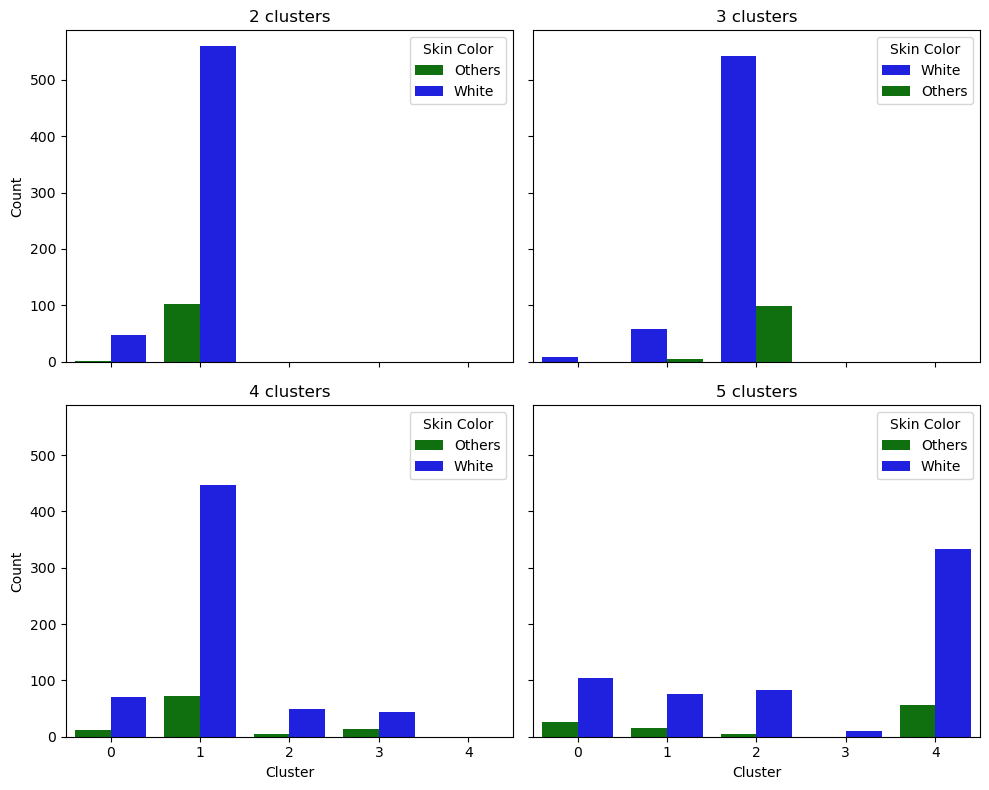

In [10]:
import math

MIN_CLUSTERS = 2
MAX_CLUSTERS = 6

COLUMNS = 2
ROWS = math.ceil((MAX_CLUSTERS - MIN_CLUSTERS) / COLUMNS)
fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(10, 8), sharey=True, sharex=True)

# Définir un dictionnaire de couleurs pour les catégories
color_palette = {"White": "blue", "Others": "green"}  # Vous pouvez ajouter ou modifier les couleurs ici

for n_clusters in range(MIN_CLUSTERS, MAX_CLUSTERS):
    current_column = (n_clusters - MIN_CLUSTERS) % COLUMNS
    current_row = (n_clusters - MIN_CLUSTERS) // COLUMNS
    ax = axs[current_row, current_column]

    kmean = KMeans(n_clusters=n_clusters, max_iter=50, n_init=30).fit(Y)
    df_cluster = df.copy(deep=True)
    df_cluster['clusters'] = kmean.labels_
    df_cluster = df_cluster.groupby(['clusters', 'Skin Color']).size().reset_index(name='counts')

    sns.barplot(x='clusters', y='counts', hue='Skin Color', data=df_cluster, ax=ax, palette=color_palette)
    ax.set_title(f"{n_clusters} clusters")
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


In [11]:
#donc avec un k-means nous n'arrivons pas a avoir des cluster cohérent

In [12]:
# no meaningful result when we use kmeans with tfidf, now we work with sentiment analysis

In [13]:
#Maintenant nous passons à l'analyse des sentiments, voyons si nous pouvons différencier une page de 'White' avec une page d'une autre ethnicité. 
#Dans un premier temps nous travaillons avec Vader pour l'analyse des sentiments

In [14]:
#NLP libraries
import spacy, nltk, gensim, sklearn

#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
df['Positive_rate'] = [0 for i in range(len(df))]
df['Negative_rate'] = [0 for i in range (len(df))]
df['Compound_rate'] = [0 for i in range (len(df))]
df['Skin Color'].apply(lambda x : 'Others' if x != 'White' else x)
df

/Users/mathisayma_1/anaconda3/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


,People,Skin Color,Positive_rate,Negative_rate,Compound_rate
0,%C3%93engus_I_of_the_Picts,White,0,0,0
1,Abbas_I_of_Persia,Others,0,0,0
2,Adam_Smith,White,0,0,0
3,Adriaen_van_der_Donck,White,0,0,0
4,Agamemnon,White,0,0,0
...,...,...,...,...,...
706,Jimmy_Wales,White,0,0,0
707,Linus_Torvalds,White,0,0,0
708,Richard_Stallman,White,0,0,0
709,Tim_Berners-Lee,White,0,0,0


In [15]:
df['Positive_rate'] = [0 for i in range(len(df))]
df['Negative_rate'] = [0 for i in range (len(df))]
df['Compound_rate'] = [0 for i in range (len(df))]
analyzer = SentimentIntensityAnalyzer()
for i in range(len(corpus)):
    with  open(corpus[i]) as page:
        page_score = analyzer.polarity_scores(page.read())
        df['Positive_rate'].iloc[i] = page_score.get('pos')
        df['Negative_rate'].iloc[i] = page_score.get('neg')
        df['Compound_rate'].iloc[i] = page_score.get('compound')


df.dropna()

/var/folders/y7/jy5_7zhn0zj995826c8zbsfc0000gp/T/ipykernel_87765/3873592364.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Positive_rate'].iloc[i] = page_score.get('pos')
/var/folders/y7/jy5_7zhn0zj995826c8zbsfc0000gp/T/ipykernel_87765/3873592364.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.039' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['Positive_rate'].iloc[i] = page_score.get('pos')
/var/folders/y7/jy5_7zhn0zj995826c8zbsfc0000gp/T/ipykernel_87765/3873592364.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,People,Skin Color,Positive_rate,Negative_rate,Compound_rate
0,%C3%93engus_I_of_the_Picts,White,0.039,0.090,-0.9986
1,Abbas_I_of_Persia,Others,0.101,0.063,0.9935
2,Adam_Smith,White,0.159,0.058,0.9999
3,Adriaen_van_der_Donck,White,0.085,0.072,0.9619
4,Agamemnon,White,0.066,0.114,-0.9985
...,...,...,...,...,...
706,Jimmy_Wales,White,0.079,0.014,0.9986
707,Linus_Torvalds,White,0.092,0.019,0.9977
708,Richard_Stallman,White,0.138,0.058,0.9999
709,Tim_Berners-Lee,White,0.086,0.010,0.9981


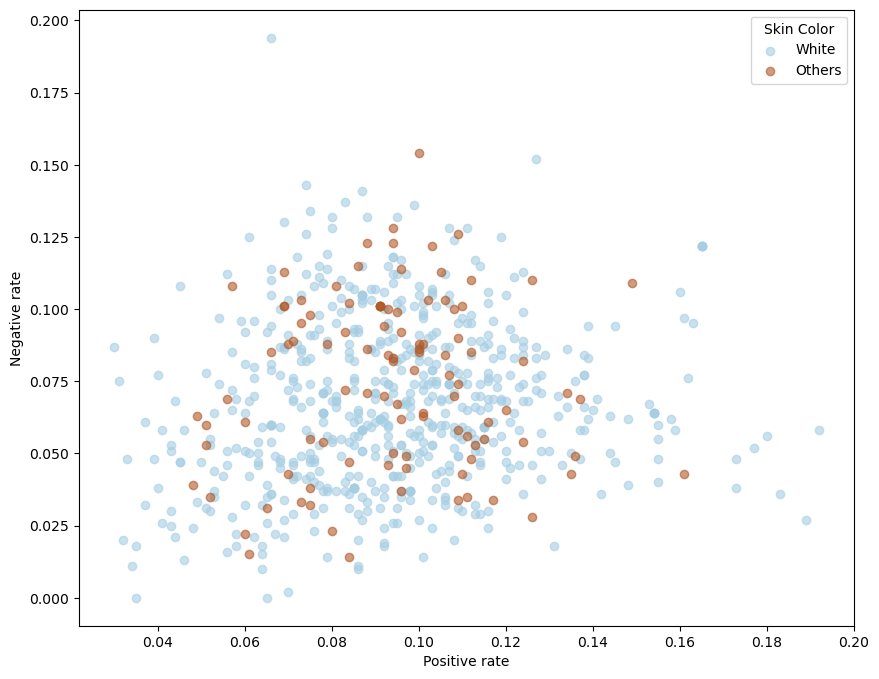

In [16]:
unique_skin_colors = df['Skin Color'].unique()
num_colors = len(unique_skin_colors)
color_map = plt.get_cmap('Paired', num_colors)  # Vous pouvez choisir une autre colormap si vous le souhaitez
# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(10, 8))

# Assigner une couleur différente à chaque valeur de 'Skin Color' en utilisant la colormap
colors = [color_map(i) for i in np.linspace(0, 1, num_colors)]
for i, skin_color in enumerate(unique_skin_colors):
    subset = df[df['Skin Color'] == skin_color]
    ax.scatter(subset['Positive_rate'], subset['Negative_rate'], label=skin_color, c=[colors[i]], alpha=0.6)

# Définir les étiquettes des axes
ax.set_xlabel("Positive rate")
ax.set_ylabel("Negative rate")

# Ajouter une légende
ax.legend(title='Skin Color')

# Afficher le graphique
plt.show()


In [17]:
df[['Skin Color', 'Positive_rate', 'Negative_rate', 'Compound_rate']].groupby(by = ['Skin Color']).describe()

Positive_rate                                                   \
                   count      mean       std    min     25%    50%    75%   
Skin Color                                                                  
Others             103.0  0.093854  0.022310  0.048  0.0785  0.094  0.109   
White              608.0  0.094171  0.027663  0.030  0.0760  0.093  0.110   

                  Negative_rate            ...                Compound_rate  \
              max         count      mean  ...     75%    max         count   
Skin Color                                 ...                                
Others      0.161         103.0  0.074942  ...  0.1005  0.154         103.0   
White       0.192         608.0  0.067306  ...  0.0860  0.194         608.0   

                                                                       
                mean       std     min      25%      50%     75%  max  
Skin Color                                                             
Others      0.235663  0.953433 -0.9999 -0.99465  0.99290  0.9991  1.0  
White       0.487937  0.848896 -0.9999 -0.20250  0.99765  0.9996  1.0  

[2 rows x 24 columns]

In [18]:
from scipy import stats
from statsmodels.stats import diagnostic
stats.ttest_ind(df.loc[df['Skin Color'] == 'White']['Positive_rate'], df.loc[df['Skin Color'] == 'Others']['Positive_rate'] )

TtestResult(statistic=0.1102480158106677, pvalue=0.9122438817995863, df=709.0)

In [19]:
stats.ttest_ind(df.loc[df['Skin Color'] == 'White']['Negative_rate'], df.loc[df['Skin Color'] == 'Others']['Negative_rate'] )

TtestResult(statistic=-2.5330680591489454, pvalue=0.011521372409871456, df=709.0)

In [20]:
#pvalue <0.05 pour negative rate , il y a donc une différence entre les articles blancs et others en moyenne, mais ce sont les articles des blancs qui sont pénalisés,
#peut être du au fait qu'on a pas matche 

In [21]:
#Analysons plus en détail en matchant une personne blanche avec une personne d'une autre catégorie qui se situe dans la même catégorie. 
#Pourquoi ? -> car une personnalité associé à l'histoire, a plus de chance d'avoir fait la guerre que un artiste par ex ...

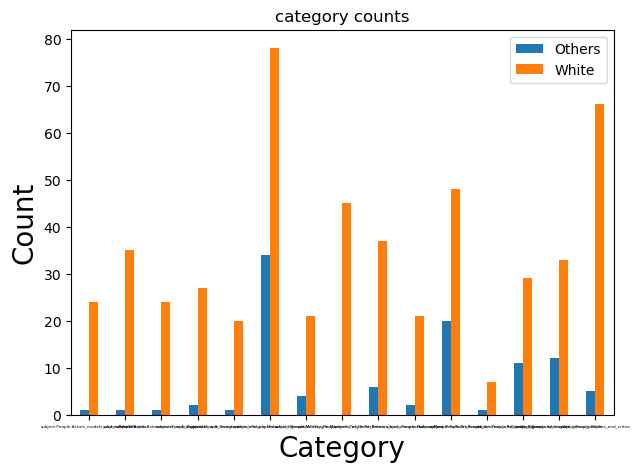

In [22]:
people_skin_color['People'].map(lambda x : unquote(x,'utf-8'))
people_skin_color
#a cofounder for rate ~ ethnicity can be category , let's visualize the différence between 

white_skin_color = people_skin_color.loc[people_skin_color['Skin Color'] == 'White']
other_skin_color = people_skin_color.loc[people_skin_color['Skin Color'] != 'White']

white_skin_color = white_skin_color[['Category','Skin Color']].groupby(['Category'], as_index = False).count()
other_skin_color = other_skin_color[['Category','Skin Color']].groupby(['Category'], as_index= False).count()
other_skin_color.columns = ['Category', 'Others']
white_skin_color.columns = ['Category', 'White']
category_df = other_skin_color.merge(white_skin_color, how='left', left_on=['Category'], right_on=['Category'])
category_df.index = category_df['Category']
pl = category_df.plot(kind='bar', figsize=[7,5], rot=0)
pl.set_title('category counts')
pl.set_ylabel('Count')
pl.set_xlabel('Category')
plt.xlabel('Category', fontsize=20)
plt.xticks(fontsize = 3)
plt.ylabel('Count', fontsize = 20)
plt.show()

In [23]:
#refaire le graph pour que l'on voit mieux les catégories

In [24]:
#remove cofounder category, we should try to match only white and other with same category : (sport player, politician,...)
import networkx as nx
#first we need to define a distance function for EXACT matching
def get_similarity(category_a, category_b):
    if (category_a.item() == category_b.item()): 
        return 1 
    else: 
        return 0    

In [25]:
#Create a bipartite graph(G = AUB) with A = papers with rebutal,
# and B = papers without rebutal and edges = similarity between nodes
a = people_skin_color[people_skin_color['Skin Color'] == 'White']
b = people_skin_color[people_skin_color['Skin Color'] != 'White']


G = nx.Graph()

for i in a[['Category']].iterrows(): 
    category_a = i[1]
    for  j in b [['Category']].iterrows():
        category_b = j[1]
        similarity = get_similarity(category_a, category_b)
        if (similarity == 1):
            G.add_weighted_edges_from([(i[0], j[0], similarity)])

In [26]:
# the layout of the matching is : row[n] is matched with row[n+1] 
matching = nx.min_weight_matching(G)
matched = list()
for i in matching: 
    matched = matched + [i[0]] + [i[1]]

In [27]:
matched_df = df.iloc[matched]
matched_df

,People,Skin Color,Positive_rate,Negative_rate,Compound_rate
78,Rudolf_Vrba,White,0.072,0.088,-0.9996
77,Rosa_Parks,Others,0.100,0.086,0.9991
355,Pope_John_Paul_II,White,0.107,0.080,0.9998
343,John_Sentamu,Others,0.048,0.039,0.6597
64,Louis_XIV_of_France,White,0.109,0.078,0.9999
...,...,...,...,...,...
162,Diego_Maradona,Others,0.124,0.054,0.9999
419,Robert_Gascoyne-Cecil%2C_3rd_Marquess_of_Salis...,White,0.066,0.054,0.9658
407,Mahatma_Gandhi,Others,0.109,0.126,-0.9997
94,William_Edington,White,0.077,0.039,0.9831


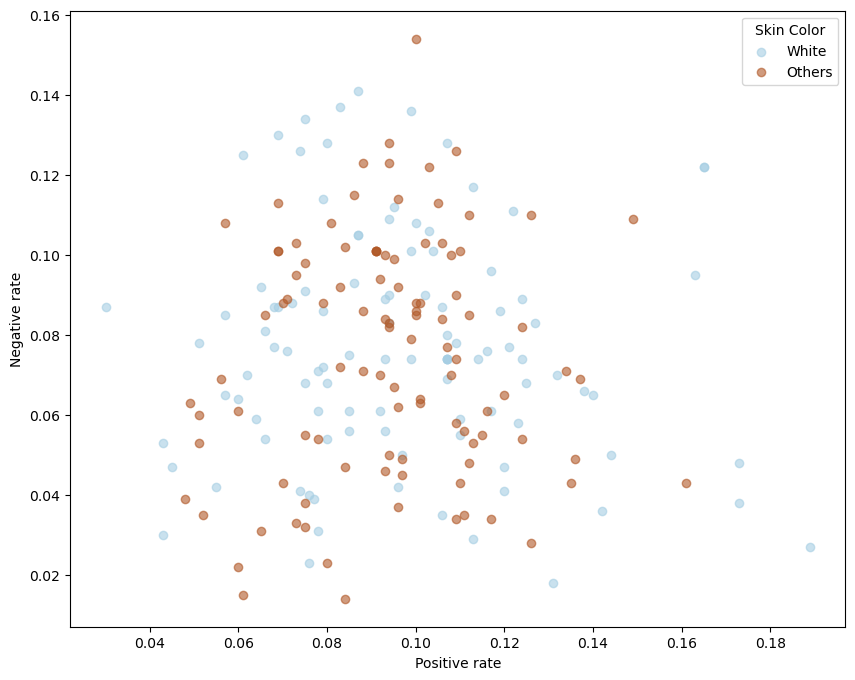

In [28]:
unique_skin_colors = matched_df['Skin Color'].unique()
num_colors = len(unique_skin_colors)
color_map = plt.get_cmap('Paired', num_colors)  # Vous pouvez choisir une autre colormap si vous le souhaitez
# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(10, 8))

# Assigner une couleur différente à chaque valeur de 'Skin Color' en utilisant la colormap
colors = [color_map(i) for i in np.linspace(0, 1, num_colors)]
for i, skin_color in enumerate(unique_skin_colors):
    subset = matched_df[matched_df['Skin Color'] == skin_color]
    ax.scatter(subset['Positive_rate'], subset['Negative_rate'], label=skin_color, c=[colors[i]], alpha=0.6)

# Définir les étiquettes des axes
ax.set_xlabel("Positive rate")
ax.set_ylabel("Negative rate")

# Ajouter une légende
ax.legend(title='Skin Color')

# Afficher le graphique
plt.show()

In [29]:
matched_df[['Skin Color', 'Positive_rate', 'Negative_rate', 'Compound_rate']].groupby(by = ['Skin Color']).describe()

Positive_rate                                                    \
                   count      mean       std    min     25%    50%     75%   
Skin Color                                                                   
Others             103.0  0.093854  0.022310  0.048  0.0785  0.094  0.1090   
White              103.0  0.096573  0.030389  0.030  0.0755  0.094  0.1135   

                  Negative_rate            ...                Compound_rate  \
              max         count      mean  ...     75%    max         count   
Skin Color                                 ...                                
Others      0.161         103.0  0.074942  ...  0.1005  0.154         103.0   
White       0.189         103.0  0.076796  ...  0.0915  0.141         103.0   

                                                                       
                mean       std     min      25%     50%      75%  max  
Skin Color                                                             
Others      0.235663  0.953433 -0.9999 -0.99465  0.9929  0.99910  1.0  
White       0.259491  0.941858 -0.9999 -0.99425  0.9927  0.99965  1.0  

[2 rows x 24 columns]

In [30]:
stats.ttest_ind(matched_df.loc[matched_df['Skin Color'] == 'White']['Positive_rate'], matched_df.loc[matched_df['Skin Color'] == 'Others']['Positive_rate'] )

TtestResult(statistic=0.7318286269385977, pvalue=0.46511304582392554, df=204.0)

In [31]:
stats.ttest_ind(matched_df.loc[matched_df['Skin Color'] == 'White']['Negative_rate'], matched_df.loc[matched_df['Skin Color'] == 'Others']['Negative_rate'] )

TtestResult(statistic=0.4573943986533421, pvalue=0.6478743266283186, df=204.0)

In [32]:
#apres le matching, on voit que l'on ne peut plus dire que en moyenne les pages wikipedia des blancs sont plus négativees que les autres .
#-> Conclusion : pas de différence significative.

In [33]:
#Try the same analysis but with a different Sentiment Analyser
#!conda install pytorch::pytorch torchvision torchaudio -c pytorch
#!conda install -c conda-forge transformers
#Utilisons un analyseur de Sentiment plus adapté pour Wikipédia que VADER. Son nom est BERT

In [34]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [35]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [36]:
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')


In [37]:
corpus_of_matched_people = matched_df['People'].apply(lambda x : dataFolder+x+'.txt')

In [38]:
results = list()
for i in range(103):
    with  open(corpus_of_matched_people.iloc[i]) as page:
        page_token = tokenizer.encode(page.read()[0:1024], padding=True, truncation= True, max_length=512, return_tensors='pt')
        result = model(page_token)
        results.append(result.logits)
        
results

[tensor([[-0.1529, -0.1273,  0.1926,  0.3707, -0.0602]],
        grad_fn=<AddmmBackward0>),
 tensor([[ 0.4258,  0.1942,  0.1473,  0.0460, -0.5658]],
        grad_fn=<AddmmBackward0>),
 tensor([[ 0.4431, -0.0423,  0.1855, -0.0712, -0.3008]],
        grad_fn=<AddmmBackward0>),
 tensor([[ 0.4227,  0.1118,  0.2939, -0.0427, -0.5558]],
        grad_fn=<AddmmBackward0>),
 tensor([[ 0.0511, -0.1005,  0.3432,  0.1551, -0.2085]],
        grad_fn=<AddmmBackward0>),
 tensor([[ 0.3006,  0.3807,  0.4884,  0.0944, -0.9568]],
        grad_fn=<AddmmBackward0>),
 tensor([[-0.0580,  0.0377,  0.3392,  0.2645, -0.4521]],
        grad_fn=<AddmmBackward0>),
 tensor([[ 0.1095,  0.0836,  0.2949,  0.1667, -0.3898]],
        grad_fn=<AddmmBackward0>),
 tensor([[-0.0045,  0.5936,  0.7679,  0.1523, -1.0706]],
        grad_fn=<AddmmBackward0>),
 tensor([[-0.4229, -0.2781,  0.2220,  0.5295,  0.1297]],
        grad_fn=<AddmmBackward0>),
 tensor([[-1.0878, -0.1171,  0.7483,  0.8761, -0.0602]],
        grad_fn=<AddmmB

In [39]:
#bert renvoie un tensor qui donne la proba que l'article soit 1 étoile, 2 étoile, ..., 5 étoiles

In [40]:
data = [tensor.flatten().tolist() for tensor in results]
bert_df = pd.DataFrame(data, columns=['one_star', 'two_star','three_star','four_star','five_star'])
bert_df

,one_star,two_star,three_star,four_star,five_star
0,-0.152941,-0.127286,0.192592,0.370700,-0.060203
1,0.425771,0.194180,0.147253,0.045961,-0.565788
2,0.443068,-0.042277,0.185532,-0.071184,-0.300782
3,0.422728,0.111796,0.293913,-0.042682,-0.555804
4,0.051113,-0.100539,0.343199,0.155069,-0.208542
...,...,...,...,...,...
98,-0.219532,-0.014827,0.331935,0.450127,-0.270266
99,-0.050460,-0.092693,0.396280,0.417571,-0.433499
100,0.607802,-0.002104,-0.021656,-0.152647,-0.319824
101,0.786889,0.050795,0.025633,-0.303275,-0.485475


In [ ]:
#pour pouvoir représenter les données nous allons réduire la dimension à deux avec l'algo pca , pour pouvoir les réprésenter comme au dessus

In [41]:
from sklearn.decomposition import PCA
bert_reduced_pca = PCA(n_components=2).fit(bert_df).transform(bert_df)
bert_reduced_pca = pd.DataFrame(bert_reduced_pca, columns=['first_component', 'second_component'])
bert_reduced_pca

,first_component,second_component
0,0.379871,-0.090009
1,-0.501516,0.038881
2,-0.374266,-0.241325
3,-0.501385,0.048968
4,0.072571,-0.043126
...,...,...
98,0.343576,0.200246
99,0.167793,0.229806
100,-0.560487,-0.395961
101,-0.842179,-0.352391


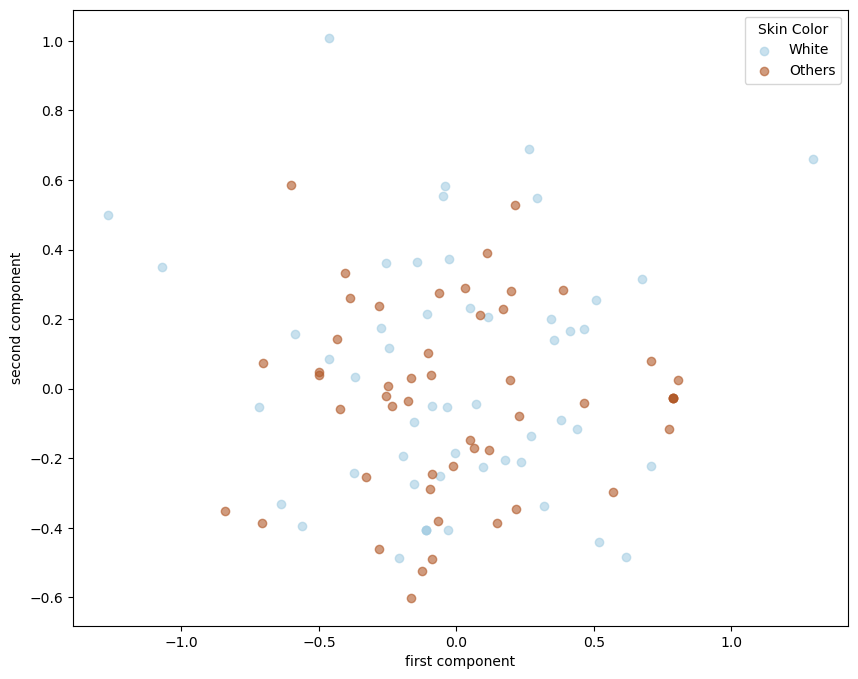

In [42]:
unique_skin_colors = ['White', 'Others']
num_colors = 2 #white and others
color_map = plt.get_cmap('Paired', num_colors)  # Vous pouvez choisir une autre colormap si vous le souhaitez
# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(10, 8))

# Assigner une couleur différente à chaque valeur de 'Skin Color' en utilisant la colormap
colors = [color_map(i) for i in np.linspace(0, 1, num_colors)]
for i, skin_color in enumerate(unique_skin_colors):
    subset = bert_reduced_pca[bert_reduced_pca.index %2 == i]
    ax.scatter(subset['first_component'], subset['second_component'], label=skin_color, c=[colors[i]], alpha=0.6)

# Définir les étiquettes des axes
ax.set_xlabel("first component")
ax.set_ylabel("second component")

# Ajouter une légende
ax.legend(title='Skin Color')

# Afficher le graphique
plt.show()

In [47]:
# On peut voir que les donnés sont toujours équitablement réparties.
#Mais faisons une analyse statistique pour être sur : 


,first_component,second_component,Skin_Color
0,0.379871,-0.090009,1
1,-0.501516,0.038881,0
2,-0.374266,-0.241325,1
3,-0.501385,0.048968,0
4,0.072571,-0.043126,1
...,...,...,...
98,0.343576,0.200246,1
99,0.167793,0.229806,0
100,-0.560487,-0.395961,1
101,-0.842179,-0.352391,0


In [51]:
temp = list()
for i in range(len(bert_reduced_pca)):
    if (i%2==0):
        temp.append('White')
    else : 
        temp.append('Others')

bert_df['Skin_Color'] = temp
bert_df[['Skin_Color', 'one_star', 'two_star', 'three_star', 'four_star','five_star']].groupby(by = ['Skin_Color']).describe()

one_star                                                    \
              count      mean       std       min       25%       50%   
Skin_Color                                                              
0              51.0  0.085048  0.316085 -0.488045 -0.134862  0.147852   
1              52.0  0.079370  0.339604 -1.087790 -0.130996  0.063097   

                               two_star            ... four_star            \
                 75%       max    count      mean  ...       75%       max   
Skin_Color                                         ...                       
0           0.277430  0.786889     51.0 -0.044113  ...  0.310975  0.606256   
1           0.298535  0.780667     52.0 -0.013389  ...  0.341448  0.876125   

           five_star                                                    \
               count      mean       std       min       25%       50%   
Skin_Color                                                               
0               51.0 -0.282565  0.254835 -0.956821 -0.467597 -0.352561   
1               52.0 -0.316407  0.295400 -1.156179 -0.489644 -0.261569   

                                
                 75%       max  
Skin_Color                      
0          -0.075288  0.149885  
1          -0.106845  0.236157  

[2 rows x 40 columns]

In [ ]:
#because there  is one categorical outcome ,  there is more than two continous predictors variables we will use a logistic regression as test

In [52]:
bert_df['Skin_Color'] = bert_df['Skin_Color'].apply(lambda x : 1 if x == 'White' else 0 )
mod = smf.logit(formula='Skin_Color ~  one_star * two_star * three_star * four_star * five_star ', data=bert_df)
res = mod.fit()
print(res.summary())



         Current function value: 0.000001
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             Skin_Color   No. Observations:                  103
Model:                          Logit   Df Residuals:                       71
Method:                           MLE   Df Model:                           31
Date:                Sat, 16 Dec 2023   Pseudo R-squ.:                     inf
Time:                        16:06:19   Log-Likelihood:            -7.8740e-05
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                          -17.6480   1.09e+

/Users/mathisayma_1/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mathisayma_1/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mathisayma_1/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/mathisayma_1/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(

In [45]:
#comme on peut voir les valeurs des p values sont très élvées ce qui signifie qu'on ne peut absolument pas conclure a un lien entre l'analyse des sentiments et le fait qu'un article concerne un blanc ou un noir .